# Import necessary modules
and read in the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
acme_raw = pd.read_excel('Acme.xlsx')
acme_raw.head()

In [5]:
acme_raw.describe()

,impression_id,click,cost,number_of_vehicles,number_of_drivers,rank,policies sold
count,10000.00000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.137400,10.0,1.608300,1.416900,3.378500,0.054500
std,2886.89568,0.344286,0.0,0.488155,0.493071,1.307214,0.227013
min,1.00000,0.000000,10.0,1.000000,1.000000,1.000000,0.000000
25%,2500.75000,0.000000,10.0,1.000000,1.000000,2.000000,0.000000
50%,5000.50000,0.000000,10.0,2.000000,1.000000,3.000000,0.000000
75%,7500.25000,0.000000,10.0,2.000000,2.000000,5.000000,0.000000
max,10000.00000,1.000000,10.0,2.000000,2.000000,5.000000,1.000000


# Explore the data

In [6]:
acme = acme_raw.copy()
print(acme.click.unique())
print(acme.cost.unique()) # useless column
print(acme.number_of_vehicles.unique())
print(acme.number_of_drivers.unique())
print(acme.marital_status.unique())
print(acme['rank'].unique())
print(acme['policies sold'].unique())

[1 0]
[10]
[1 2]
[1 2]
['M' 'S']
[1 4 2 5 3]
[1 0]


## Clean some data

- `married`: 1 for married, 0 for single
- `insured`: 1 for currently insured, 0 for not

In [7]:
acme = acme.drop('cost', axis = 1)

acme['policies_sold'] = acme['policies sold']
acme = acme.drop('policies sold', axis = 1)

acme['married'] = pd.get_dummies(acme['marital_status'])['M']
acme = acme.drop('marital_status', axis = 1)

acme['insured'] = pd.get_dummies(acme['currently_insured'])['Y']
acme = acme.drop('currently_insured', axis = 1)

acme.head()

,impression_id,click,number_of_vehicles,number_of_drivers,rank,policies_sold,married,insured
0,1,1,1,1,1,1,1,0
1,2,0,2,1,4,0,1,0
2,3,0,1,1,2,0,0,0
3,4,0,2,1,5,0,1,1
4,5,0,2,2,4,0,0,1


## Some probability

In [8]:
print("There are in total %d ads clicked" % acme.click.sum())
print("There are in total %d policies sold" %  acme.policies_sold.sum())
acme.columns

There are in total 1374 ads clicked
There are in total 545 policies sold


Index(['impression_id', 'click', 'number_of_vehicles', 'number_of_drivers',
       'rank', 'policies_sold', 'married', 'insured'],
      dtype='object')

In [17]:
def getPie(ax, values, title):
    colors = ['y', 'g', 'b']
    explode = [0, 0, 0.2]
    labels = ["Didn't click", "Clicked, didn't buy", "bought"]
    ax.pie(values, colors = colors, labels = labels, explode = explode, autopct = '%1.1f%%')
    ax.title.set_text(title)
    
def getValue(col_name, val):
    acme_sub = acme[acme[col_name] == val]
    return [len(acme_sub[acme_sub['click'] == 0]),
            len(acme_sub[(acme_sub['click'] == 1) & (acme_sub['policies_sold'] == 0)]),
            len(acme_sub[(acme_sub['click'] == 1) & (acme_sub['policies_sold'] == 1)])]
    

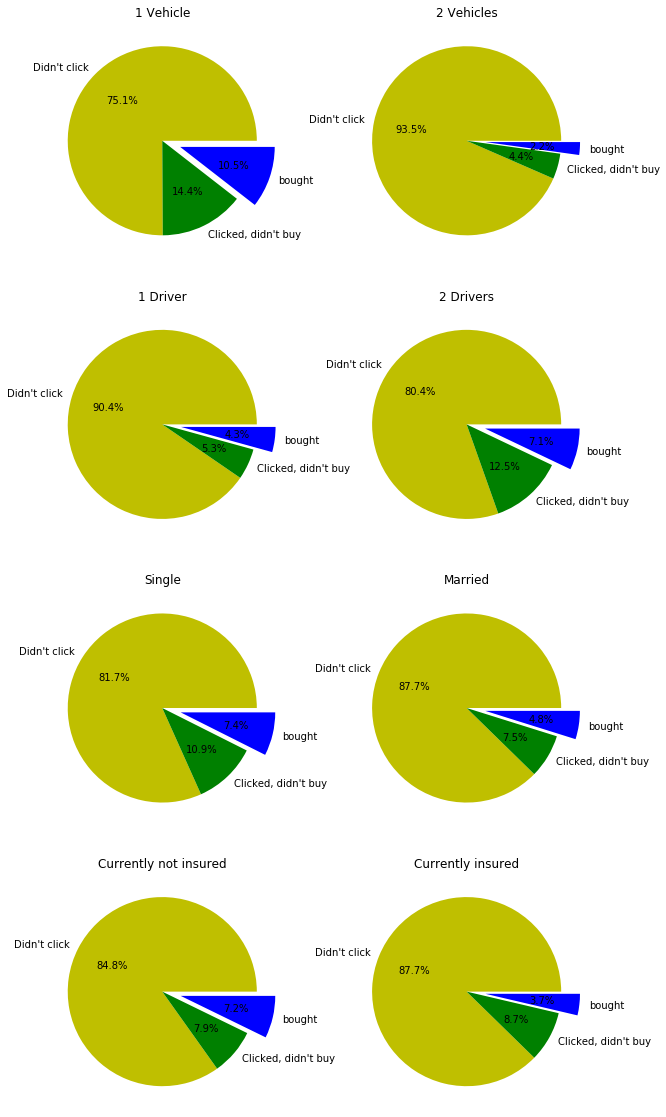

In [18]:
fig, ax = plt.subplots(4,2, figsize = (10,20))
#getValue('number_of_vehicles', 1)
getPie(ax[0, 0], getValue('number_of_vehicles', 1), '1 Vehicle')
getPie(ax[0, 1], getValue('number_of_vehicles', 2), '2 Vehicles')


getPie(ax[1, 0], getValue('number_of_drivers', 1), '1 Driver')
getPie(ax[1, 1], getValue('number_of_drivers', 2), '2 Drivers')


getPie(ax[2, 0], getValue('married', 0), 'Single')
getPie(ax[2, 1], getValue('married', 1), 'Married')

getPie(ax[3, 0], getValue('insured', 0), 'Currently not insured')
getPie(ax[3, 1], getValue('insured', 1), 'Currently insured')

plt.show()

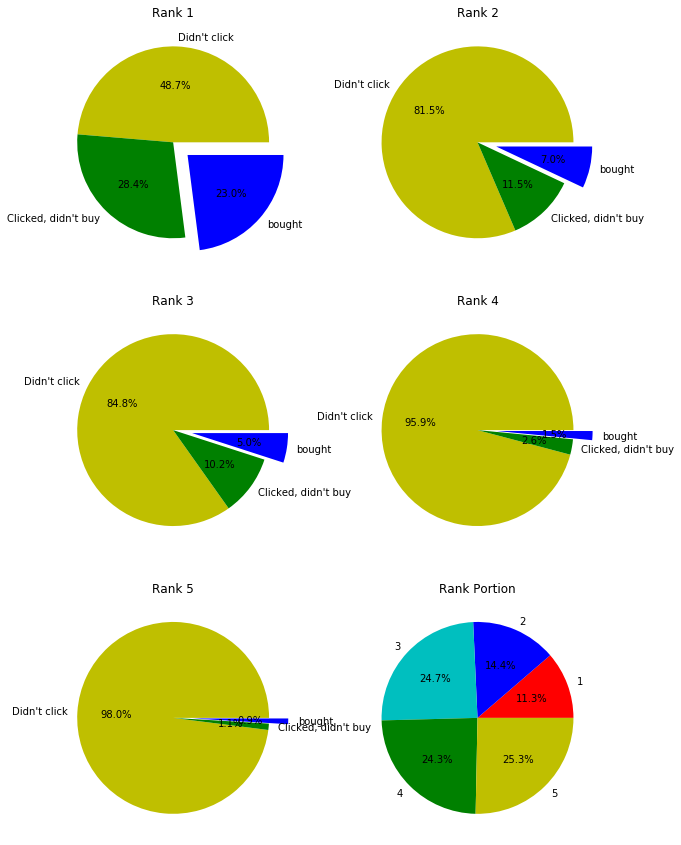

In [14]:
fig, ax = plt.subplots(3,2, figsize = (10,15))
#getValue('number_of_vehicles', 1)

for i in range(5):
    getPie(ax[i // 2, i % 2], getValue('rank', i + 1), 'Rank %d' % (i + 1))


ax[2,1].pie([len(acme[acme['rank'] == 1]),
             len(acme[acme['rank'] == 2]),
             len(acme[acme['rank'] == 3]),
             len(acme[acme['rank'] == 4]),
             len(acme[acme['rank'] == 5])],
            colors = ['r', 'b', 'c', 'g', 'y'],
            labels = list(range(1, 6)),
            autopct = '%1.1f%%'
)
ax[2, 1].title.set_text("Rank Portion")
    
plt.show()